# Exploratory Data Analysis (EDA)

importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
concrete = pd.read_csv('../data/clean_data.csv')
concrete.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",water_cement_ratio
0,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366,0.300000
1,266.0,114.0,0.0,228.0,0.0,932.0,670.0,90,47.029847,0.857143
2,380.0,95.0,0.0,228.0,0.0,932.0,594.0,28,36.447770,0.600000
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.854291,0.857143
4,475.0,0.0,0.0,228.0,0.0,932.0,594.0,28,39.289790,0.480000


### `DESCRIPTIVE STATISTICS` 

In [10]:
concrete.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",water_cement_ratio
count,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000,911.000000
mean,272.267344,71.439791,59.929089,181.300329,6.021136,976.478979,775.700329,32.119649,34.032941,0.768266
std,101.408880,86.144382,64.533436,18.587068,5.234950,77.576446,75.335852,28.420546,15.852243,0.312640
min,102.000000,0.000000,0.000000,127.300000,0.000000,801.000000,594.000000,1.000000,2.331808,0.279693
25%,190.340000,0.000000,0.000000,167.000000,0.000000,932.000000,736.800000,7.000000,22.333162,0.550143
50%,252.310000,19.000000,0.000000,185.000000,6.650000,971.800000,780.090000,28.000000,33.060374,0.724169
75%,335.000000,142.650000,119.900000,192.000000,10.000000,1040.300000,822.000000,28.000000,44.112674,0.959906
max,540.000000,342.100000,200.100000,228.000000,22.100000,1145.000000,945.000000,120.000000,76.800732,1.882353


### `Visualizing Distributions`

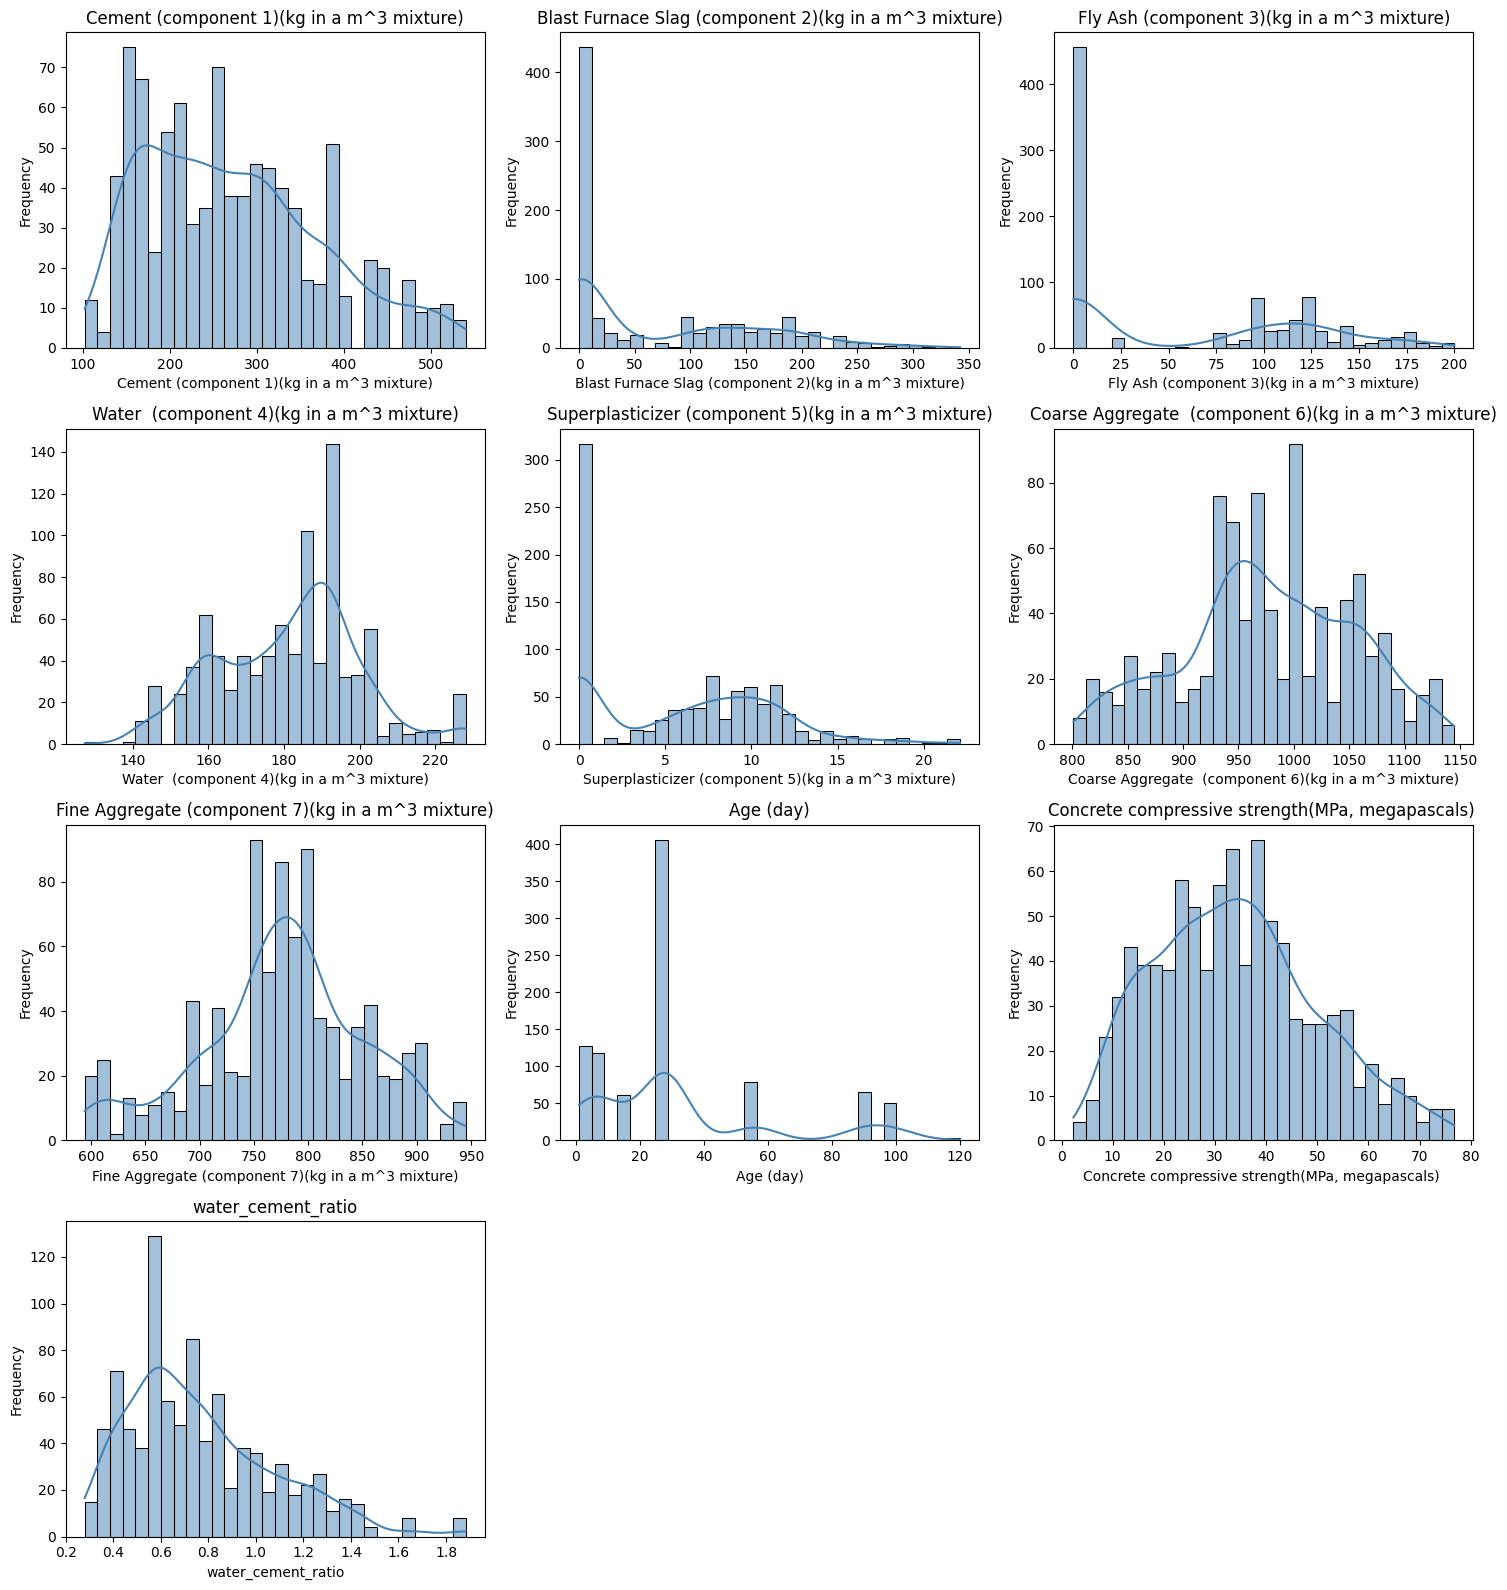

In [9]:
columns = concrete.columns

# Number of features
n = len(columns)
rows = (n // 3) + 1
cols =3

plt.figure(figsize=(15, 4*rows))

for i, col in enumerate(columns, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(concrete[col], kde=True, bins=30, color='steelblue')
    plt.title(f'{col}')
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### `Correlation Analysis`

In [12]:
corr_matrix = concrete.corr()
corr_matrix

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)",water_cement_ratio
Cement (component 1)(kg in a m^3 mixture),1.000000,-0.301318,-0.355057,-0.050050,-0.020142,-0.071719,-0.266868,-0.047367,0.457178,-0.880124
Blast Furnace Slag (component 2)(kg in a m^3 mixture),-0.301318,1.000000,-0.336809,0.150637,0.008218,-0.281775,-0.305076,-0.049719,0.097370,0.394291
Fly Ash (component 3)(kg in a m^3 mixture),-0.355057,-0.336809,1.000000,-0.294462,0.516779,-0.059708,0.076313,0.065130,-0.008967,0.203184
Water (component 4)(kg in a m^3 mixture),-0.050050,0.150637,-0.294462,1.000000,-0.624852,-0.248843,-0.357326,-0.013421,-0.341101,0.307426
Superplasticizer (component 5)(kg in a m^3 mixture),-0.020142,0.008218,0.516779,-0.624852,1.000000,-0.192646,0.093877,0.034417,0.366191,-0.147251
Coarse Aggregate (component 6)(kg in a m^3 mixture),-0.071719,-0.281775,-0.059708,-0.248843,-0.192646,1.000000,-0.161615,0.029171,-0.145272,-0.077451
Fine Aggregate (component 7)(kg in a m^3 mixture),-0.266868,-0.305076,0.076313,-0.357326,0.093877,-0.161615,1.000000,0.046769,-0.178192,0.120877
Age (day),-0.047367,-0.049719,0.065130,-0.013421,0.034417,0.029171,0.046769,1.000000,0.518331,0.013571
"Concrete compressive strength(MPa, megapascals)",0.457178,0.097370,-0.008967,-0.341101,0.366191,-0.145272,-0.178192,0.518331,1.000000,-0.482211
water_cement_ratio,-0.880124,0.394291,0.203184,0.307426,-0.147251,-0.077451,0.120877,0.013571,-0.482211,1.000000


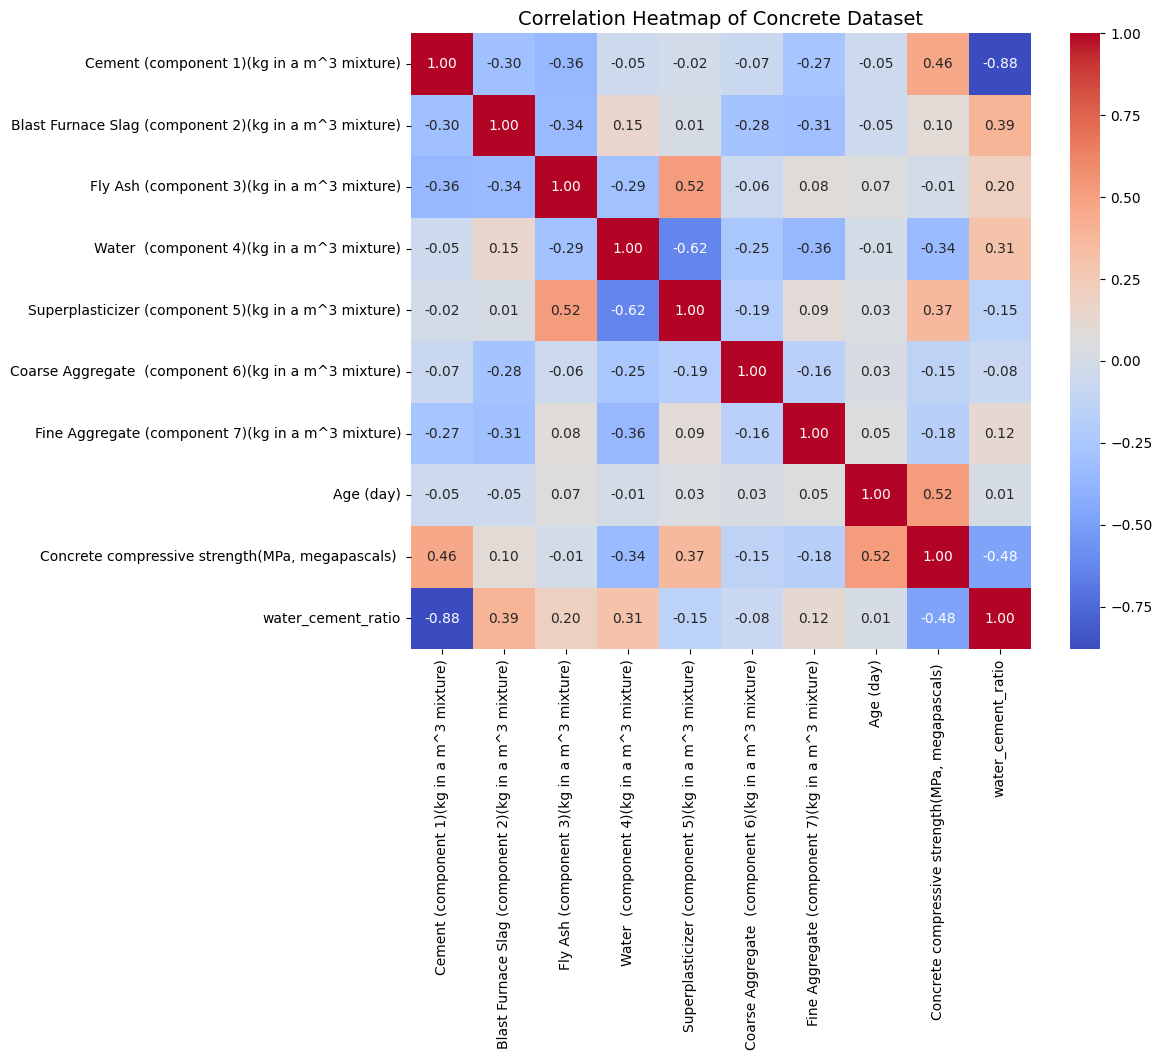

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Correlation Heatmap of Concrete Dataset", fontsize=14)
plt.show()

### `Enginerring influence of water-cemet ratio`

In [15]:
list_features =list(concrete.columns)
print(list_features)

['Cement (component 1)(kg in a m^3 mixture)', 'Blast Furnace Slag (component 2)(kg in a m^3 mixture)', 'Fly Ash (component 3)(kg in a m^3 mixture)', 'Water  (component 4)(kg in a m^3 mixture)', 'Superplasticizer (component 5)(kg in a m^3 mixture)', 'Coarse Aggregate  (component 6)(kg in a m^3 mixture)', 'Fine Aggregate (component 7)(kg in a m^3 mixture)', 'Age (day)', 'Concrete compressive strength(MPa, megapascals) ', 'water_cement_ratio']


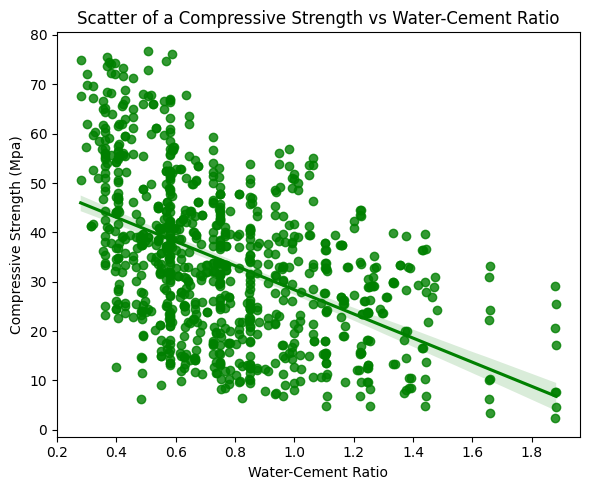

In [24]:
plt.figure(figsize=(6, 5))
sns.regplot(data=concrete,
            x='water_cement_ratio',
            y='Concrete compressive strength(MPa, megapascals) ',
            color='green')
plt.xlabel("Water-Cement Ratio")
plt.ylabel("Compressive Strength (Mpa)")
plt.title("Scatter of a Compressive Strength vs Water-Cement Ratio")
plt.tight_layout()

plt.show()